<a href="https://colab.research.google.com/github/hariszaf/metabolic_toy_model/blob/main/Antony2025/preparingYourEnvironment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metabolic Models Applied to Microbiomes


## **Preparing for the workshop**

The workshop content is accessible through the browser. Consists of a series of [Jupyter Notebooks](https://www.dataquest.io/blog/jupyter-notebook-tutorial/):




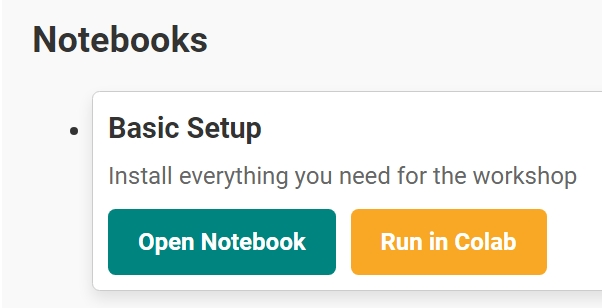


1) Click on **Open Notebook** to view the content as a static html page.


\\

2) Click on **Run in Colab** to a google colab interface. There you can execute the code directly on the browser, provided you have a Google account.

You can also run the code locally in your laptop.


### **Creating a Conda environment**

Here, I assume you have Miniconda or Anaconda installed in your machine. If you don't, follow [this tutorial](https://eduand-alvarez.medium.com/setting-up-anaconda-on-your-windows-pc-6e39800c1afb
).

\\


1) First create a Conda environment called **gsmmWorkshop**:

```bash
conda create -n gsmmWorkshop python=3.11.11
```

select **y**

2) Activate your environment

```bash
conda activate gsmmWorkshop

```



### **Installing Gurobi**

A **Genome-scale metabolic model** is essentially a set of linear inequalities, which require some form of [linear programming](https://gatiaher.github.io/projects/intuition-for-linear-programming/) to **solve**.

[Guroby](https://www.gurobi.com/) is a linear solver that is free for academic usage.


You can generate a free academic license by following the steps in the [**Academic**](https://www.gurobi.com/academia/academic-program-and-licenses/) tab while connected to the internet of an academic institution.

Here we are sharing a license that will be deactivated a few days after the workshop. Make sure to obtain your own license to be a able to work with the course content in the long term.

#### **Create a script that generates a local gurobi license**

later, replace the `WLSACCESSID`, `WLSSECRET`, and `LICENSEID` fields with your own license:


```python
import os
# Create directory for the license
os.makedirs("content/licenses", exist_ok=True)

def create_gurobi_license():
    license_content = (
        "# Gurobi WLS license file\n"
        "# Your credentials are private and should not be shared or copied to public repositories.\n"
        "# Visit https://license.gurobi.com/manager/doc/overview for more information.\n"
        "WLSACCESSID=1fedf73b-9471-4da8-bdc7-2aaacf2e30f3\n"
        "WLSSECRET=3bc7d209-a4ec-4195-98be-4b254f181512\n"
        "LICENSEID=940603"
    )
    with open("content/licenses/gurobi.lic", "w") as f:
        f.write(license_content)
    print("License file created at content/licenses/gurobi.lic")

if __name__ == "__main__":
    create_gurobi_license()

```
save the script as `crete_gurobi_license.py`

run the script:

```bash
python create_gurebi_license.py

```

#### **Install Gurobipy and make sure it works**


<span style="color:red;">Don't use **conda** install.</span>


```bash
pip install gurobipy
```

Create the test script `test_guroby.py`:

```python
#set up the gurobi license
import os
os.environ['GRB_LICENSE_FILE'] = 'content/licenses/gurobi.lic'

import gurobipy
from gurobipy import Model
model = Model("test")
print("Gurobi is working!", "\U0001F600")

```
run the script

```bash
python test_gurobi.py
```

You should see:

```bash

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 940603
Academic license 940603 - for non-commercial use only - registered to da___@gmail.com
Gurobi is working! 😀
```

\\



### **Let's replicate these steps in the Notebook**


Function to create a WSL Gurobi license.

In [1]:
def create_gurobi_license():
    license_content = (
        "# Gurobi WLS license file\n"
        "# Your credentials are private and should not be shared or copied to public repositories.\n"
        "# Visit https://license.gurobi.com/manager/doc/overview for more information.\n"
        "WLSACCESSID=1fedf73b-9471-4da8-bdc7-2aaacf2e30f3\n"
        "WLSSECRET=3bc7d209-a4ec-4195-98be-4b254f181512\n"
        "LICENSEID=940603"
    )
    with open("/content/licenses/gurobi.lic", "w") as f:
        f.write(license_content)
    print("License file created at /content/licenses/gurobi.lic")



Run the function and add the license to our path.

In [2]:
import os

# Create directory for the license
os.makedirs("/content/licenses", exist_ok=True)

# Generate the license file
create_gurobi_license()

#add to path
os.environ['GRB_LICENSE_FILE'] = '/content/licenses/gurobi.lic'


License file created at /content/licenses/gurobi.lic


Install Gurobipy

In [3]:
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 70.9 MB/s eta 0:00:00


Make sure it works.

In [5]:
import gurobipy
from gurobipy import Model
model = Model("test")
print("Gurobi is working!", "\U0001F600")

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 940603
Academic license 940603 - for non-commercial use only - registered to da___@gmail.com
Gurobi is working! 😀


## **Install COBRApy and make sure it works**

[**COBRApy**](https://opencobra.github.io/cobrapy/) will be our main interface with metabolic models (also called **constrained based metabolic models**). We will use it heavily in the Workshop when working with metabolic models and **Python**.

<span style="color:red;">Again, don't use **conda** install.</span>

```bash
pip install cobra
```

write the script `test_cobra.py` and run it.

\\

```python
import os
#set the gurobi license
os.environ['GRB_LICENSE_FILE'] = 'content/licenses/gurobi.lic'

import cobra
from cobra.io import load_model

model = load_model("textbook")

solution = model.optimize()

print(f"flux balance analysis solution is {solution.objective_value}")

print("COBRApy is working", "\U0001F600")

```

\\

```bash
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 940603
Academic license 940603 - for non-commercial use only - registered to da___@gmail.com
flux balance analysis solution is 0.8739215069684301
COBRApy is working 😀
Warning: environment still referenced so free is deferred (Continue to use WLS)
```

### **Replicate in the Notebook**

Install **Cobrapy**

In [7]:
#install COBRApy
!pip install cobra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 33.6 MB/s eta 0:00:00


#### **Run the test_cobra script**

\\

The environment variable set above is preserverd in the Notebook.

In [8]:
import cobra
from cobra.io import load_model

model = load_model("textbook")

solution = model.optimize()

print(f"flux balance analysis solution is {solution.objective_value}")

print("COBRApy is working", "\U0001F600")

flux balance analysis solution is 0.8739215069684305
COBRApy is working 😀


Make sure the solver being used is **Gurobi**

In [11]:
model.solver

### **Install DNNGIOR and make sure it works**

In [14]:
!pip install dnngior

  Using cached dnngior-0.0.4-py3-none-any.whl.metadata (1.5 kB)
  Using cached cobra-0.23.0-py2.py3-none-any.whl.metadata (9.4 kB)
  Using cached gurobipy-10.0.3-cp311-cp311-manylinux2014_x86_64.whl.metadata (15 kB)
  Using cached depinfo-1.7.0-py2.py3-none-any.whl.metadata (3.6 kB)
  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pydantic-1.10.21-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (153 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.0/36.0 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 74.6 MB/s eta

In [13]:
import dnngior.gapfill_class.Gapfill

ModuleNotFoundError: No module named 'dnngior'